## 오차역전파 (Backpropagation)


### 오차역전파 알고리즘
- 학습 데이터로 정방향(forward) 연산을 통해 손실함수 값(loss)을 구함

- 각 layer별로 역전파학습을 위해 중간값을 저장

- 손실함수를 학습 파라미터(가중치, 편향)로 미분하여  
  마지막 layer로부터 앞으로 하나씩 연쇄법칙을 이용하여 미분
  각 layer를 통과할 때마다 저장된 값을 이용

- 오류(error)를 전달하면서 학습 파라미터를 조금씩 갱신


### 오차역전파 학습의 특징
- 손실함수를 통한 평가를 한 번만 하고, 연쇄법칙을 이용한 미분을 활용하기 때문에  
  학습 소요시간이 매우 단축!

- 미분을 위한 중간값을 모두 저장하기 때문에 메모리를 많이 사용


### 신경망 학습에 있어서 미분가능의 중요성
- 경사하강법(Gradient Descent)에서 손실 함수(cost function)의 최소값,  
  즉, 최적값을 찾기 위한 방법으로 미분을 활용

- 미분을 통해 손실 함수의 학습 매개변수(trainable parameter)를 갱신하여  
  모델의 가중치의 최적값을 찾는 과정

![](https://i.pinimg.com/originals/5d/13/20/5d1320c7b672710834e63b95a7c1037b.png)

<sub>출처: https://www.pinterest.co.kr/pin/424816177350692379/</sub>

### 합성함수의 미분 (연쇄법칙, chain rule)

## $\qquad \frac{d}{dx} [f(g(x))] = f^\prime(g(x))g^\prime(x)$  


- 여러 개 연속으로 사용가능  
  ## $ \quad \frac{\partial f}{\partial x} = \frac{\partial f}{\partial u} \times \frac{\partial u}{\partial m} \times \frac{\partial m}{\partial n} \times \ ... \ \frac{\partial l}{\partial k} \times \frac{\partial k}{\partial g} \times \frac{\partial g}{\partial x} $
- 각각에 대해 편미분 적용가능

![](https://cdn-media-1.freecodecamp.org/images/1*_KMMFvRP5X9kC59brI0ykw.png)

<sub>출처: https://www.freecodecamp.org/news/demystifying-gradient-descent-and-backpropagation-via-logistic-regression-based-image-classification-9b5526c2ed46/</sub>

- **오차역전파의 직관적 이해**
  - 학습을 진행하면서, 즉 손실함수의 최소값(minimum)을 찾아가는 과정에서 가중치 또는 편향의 변화에 따라 얼마나 영향을 받는지 알 수 있음



#### 합성함수 미분(chain rule) 예제

![](https://miro.medium.com/max/1000/1*azqHvbrNsZ8AIZ7H75tbIQ.jpeg)

<sub>출처: https://medium.com/spidernitt/breaking-down-neural-networks-an-intuitive-approach-to-backpropagation-3b2ff958794c</sub>

  #### $\quad a=-1, \ b=3, \ c=4$,
  #### $\quad x = a + b, \ y = b + c, \ f = x * y \ 일 때$    



  ### $\quad \begin{matrix}\frac{\partial f}{\partial x} &=& y\ + \ x \ \frac{\partial y}{\partial x} \\ &=& (b \ + \ c) \ + \ (a \ +\ b)\ \times \ 0 \\ &=& 7 \end{matrix}$

  ### $\quad \begin{matrix}\frac{\partial f}{\partial y} &=& x\ + \ \frac{\partial x}{\partial y} \ y \\ &=& (a \ + \ b) \ + \ 0 \times (b \ +\ c) \\ &=& 2 \end{matrix}$

   <br>

  ### $ \quad \begin{matrix} \frac{\partial x}{\partial a} &=& 1 \ + \ a \ \frac{\partial b}{\partial a} \\ &=& 1 \end{matrix} $
  ### $ \quad \begin{matrix} \frac{\partial y}{\partial c} &=& \frac{\partial b}{\partial c}\ + 1 \\ &=& 1 \end{matrix} $
  
  <br>

  ### $ \quad \begin{matrix} \frac{\partial f}{\partial a} &=& \frac{\partial f}{\partial x} \times \frac{\partial x}{\partial a} \\ &=& y \times 1 \\ &=& 7 \times 1 = 7 \\ &=& 7  \end{matrix} $
    
  ### $ \quad \begin{matrix} \frac{\partial f}{\partial b}\ &=& \frac{\partial x}{\partial b} \ y \ + \ x \ \frac{\partial y}{\partial b}  \\ &=& 1 \times 7 + 2 \times 1  \\ &=& 9 \end{matrix} $
  

  
  

### 덧셈, 곱셈 계층의 역전파
- 위 예제를 통해 아래 사항을 알 수 있음

  #### 1. $\quad z = x + y$ 일 때,
  ## $\frac{\partial z}{\partial x} = 1, \frac{\partial z}{\partial y} = 1 $

  #### 2. $\quad t = xy$ 일 때,
  ## $\frac{\partial t}{\partial x} = y, \frac{\partial t}{\partial y} = x$


In [2]:
class Mul():

    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y

        return out

    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x

        return dx, dy


In [3]:
class Add():
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x + y
        return out

    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        return dx, dy

In [4]:
a, b, c  = -1, 3, 4
x = Add()
y = Add()
f = Mul()

In [5]:
x_out = x.forward(a, b)
y_out = y.forward(b, c)
f_out = f.forward(x_out, y_out)

print(x_out, y_out, f_out)

2 7 14


In [6]:
dout = 1
dx_mul, dy_mul = f.backward(dout)

da_add, db_add1 = x.backward(dx_mul)
db_add2, dc_add = y.backward(dy_mul)

print(dx_mul, dy_mul)
print(da_add)
print(db_add1 + db_add2)
print(dc_add)

7 2
7
9
2


![](https://miro.medium.com/max/2000/1*U3mVDYuvnaLhJzIFw_d5qQ.png)
<sub>출처: https://medium.com/spidernitt/breaking-down-neural-networks-an-intuitive-approach-to-backpropagation-3b2ff958794c</sub>

### 활성화 함수(Activation)에서의 역전파

#### 시그모이드(Sigmoid) 함수

![](https://media.geeksforgeeks.org/wp-content/uploads/20190911181329/Screenshot-2019-09-11-18.05.46.png)

<sub>출처: https://www.geeksforgeeks.org/implement-sigmoid-function-using-numpy/</sub>

- 수식
  # $\quad y = \frac{1}{1 + e^{-x}} $일 때,

  ## $\quad \begin{matrix}y' &=& (\frac{1}{1 + e^{-x}})' \\ &=& \frac{-1}{(1 + e^{-x})^2}\ \times \ (-e^{-x}) \\ &=& \frac{1}{1 + e^{-x}} \ \times \ \frac{e^{-x}}{1 + e^{-x}} \\ &=& \frac{1}{1 + e^{-x}} \ \times \ (1 - \frac{1}{1 + e^{-x}}) \\ &=& y\ (1\ - \ y) \end{matrix}$

In [7]:
class Sigmoid():
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        return dx

#### ReLU 함수

![](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2018/10/Line-Plot-of-Rectified-Linear-Activation-for-Negative-and-Positive-Inputs.png)

<sub>출처: https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/</sub>


- 수식  

  ### $\qquad y= \begin{cases} x & (x \ge 0)  \\ 0 & (x < 0) \end{cases}$ 일 때,

  <br>

  ### $\qquad \frac{\partial y}{\partial x}= \begin{cases} 1 & (x \ge 0)  \\ 0 & (x < 0) \end{cases}$

In [8]:
class ReLU():

    def __init__(self):
        self.out = None

    def forward(self, x):
        self.mask = (x < 0)
        out = x.copy()
        out[x < 0] = 0
        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        return dx

### 행렬 연산에 대한 역전파

# $\qquad Y = X \bullet W + B$

#### 순전파(forward)
  
  - 형상(shape)을 맞춰줘야함
  - 앞서 봤던 곱셈, 덧셈 계층을 합친 형태

In [9]:
import numpy as np

X = np.random.rand(3)
W = np.random.rand(3, 2)
B = np.random.rand(2)

print(X.shape)
print(W.shape)
print(B.shape)

(3,)
(3, 2)
(2,)


In [10]:
Y = np.dot(X, W) + B
print(Y.shape)

(2,)


#### 역전파(1)

##  $\  Y = X \bullet W$
- $X :\ \ (2,\ )$

- $W :\ \ (2,\ 3)$

- $X \bullet W :\ \ (3,\ )$

- $\frac{\partial L}{\partial Y} :\ \ (3,\ )$

- $\frac{\partial L}{\partial X} = \frac{\partial L}{\partial Y}\bullet W^T ,\ (2,\ )$

- $\frac{\partial L}{\partial W} = X^T \bullet \frac{\partial L}{\partial Y} ,\ (2,\ 3)$



In [11]:
X = np.random.rand(2)
W = np.random.rand(2, 3)
Y = np.dot(X, W)

print('X\n{}'.format(X))
print('W\n{}'.format(W))
print('Y\n{}'.format(Y))

X
[0.4927355  0.11122447]
W
[[0.14188929 0.44605135 0.56026003]
 [0.51471132 0.11913212 0.42421914]]
Y
[0.12716239 0.23303574 0.32324356]


In [12]:
dL_dY = np.random.rand(3)
dL_dX = np.dot(dL_dY, W.T)
dL_dW = np.dot(X.reshape(-1, 1), dL_dY.reshape(1, -1))

print('dL_dY\n{}'.format(dL_dY))
print('dL_dX\n{}'.format(dL_dX))
print('dL_dW\n{}'.format(dL_dW))

dL_dY
[0.37030131 0.40894114 0.37208355]
dL_dX
[0.44341408 0.39716126]
dL_dW
[[0.1824606  0.20149982 0.18333877]
 [0.04118657 0.04548426 0.0413848 ]]


#### 역전파(2)

## $\ (2)\  Y = X \bullet W + B$
- $X, W$는 위와 동일

- $B: \ (3, )$

- $\frac{\partial L}{\partial B} = \frac{\partial L}{\partial Y}, \ (3,\ )$

In [13]:
X = np.random.rand(2)
W = np.random.rand(2, 3)
B = np.random.rand(3)
Y = np.dot(X, W) + B

print(Y)

[0.70926426 0.8731848  0.65337711]


In [14]:
dL_dY = np.random.rand(3)
dL_dX = np.dot(dL_dY, W.T)
dL_dW = np.dot(X.reshape(-1, 1), dL_dY.reshape(1, -1))
dL_dB = dL_dY

print('dL_dY\n{}'.format(dL_dY))
print('dL_dX\n{}'.format(dL_dX))
print('dL_dW\n{}'.format(dL_dW))
print('dL_dB\n{}'.format(dL_dB))

dL_dY
[0.46347746 0.76729702 0.40088195]
dL_dX
[0.80318614 0.73636405]
dL_dW
[[0.13638085 0.22578147 0.11796177]
 [0.28938233 0.47907874 0.25029945]]
dL_dB
[0.46347746 0.76729702 0.40088195]


#### 배치용 행렬 내적 계층
- N개의 데이터에 대해,  
# $\qquad Y = X \bullet W + B$

  - $X : \quad  (N,\ 3)$

  - $W : \quad  (3,\ 2)$

  - $B : \quad  (2,\ )$
  

In [15]:
X = np.random.rand(4, 3)
W = np.random.rand(3, 2)
B = np.random.rand(2)

print(X.shape)
print(W.shape)
print(B.shape)

(4, 3)
(3, 2)
(2,)


In [16]:
print('X\n{}'.format(X))
print('W\n{}'.format(W))
print('B\n{}'.format(B))

X
[[0.91841398 0.85967896 0.35028229]
 [0.49427263 0.08363862 0.75887601]
 [0.08992008 0.60013388 0.46263079]
 [0.08071498 0.99435986 0.55063659]]
W
[[0.47633557 0.35143823]
 [0.73542019 0.37891509]
 [0.94645965 0.32242371]]
B
[0.78115417 0.33162347]


In [17]:
Y = np.dot(X, W) + B
print('Y\n{}'.format(Y))
print('Y.shape:', Y.shape)

Y
[[2.18238073 1.09307391]
 [1.79634885 0.78170133]
 [1.70319825 0.73978775]
 [2.07202921 0.91430605]]
Y.shape: (4, 2)


In [18]:
dL_dY = np.random.rand(4, 2)
dL_dX = np.dot(dL_dY, W.T)
dL_dW = np.dot(X.T, dL_dY)
dL_dB = np.sum(dL_dY, axis=0)

print('dL_dY\n{}'.format(dL_dY))
print('dL_dX\n{}'.format(dL_dX))
print('dL_dW\n{}'.format(dL_dW))
print('dL_dB\n{}'.format(dL_dB))

dL_dY
[[0.35804584 0.78992295]
 [0.20758671 0.91233229]
 [0.02032858 0.57424196]
 [0.95124433 0.4333334 ]]
dL_dX
[[0.44815909 0.56262787 0.59356583]
 [0.41950938 0.49835993 0.49063   ]
 [0.21149381 0.23253899 0.2043894 ]
 [0.60540143 0.86376085 1.04003134]]
dL_dW
[[0.51004635 1.26302954]
 [1.28324579 1.53089775]
 [0.81614424 1.47331434]]
dL_dB
[1.53720546 2.7098306 ]


In [23]:
class Layer():

    def __init__(self):
        self.W = np.random.randn(3, 2)
        self.b = np.random.rand(2)
        self.x = None
        self.dW = None
        self.db = None

    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b
        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        return dx


In [24]:
np.random.seed(111)

layer = Layer()

In [25]:
X = np.random.rand(2, 3)
Y = layer.forward(X)
print(X)
print(Y)

[[0.23868214 0.33765619 0.99071246]
 [0.23772645 0.08119266 0.66960024]]
[[-0.52304728 -0.06321427]
 [-0.65288851  0.1750925 ]]


In [ ]:
dout = np.random.rand(2, 2)
dX = layer.backward(dout)
print(dX)
print(layer.dW)
print(layer.db)

### MNIST 분류 with 역전파


#### Modules Import

In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from collections import OrderedDict

#### 데이터 로드

In [32]:
np.random.seed(42)

(X_train, y_train), (X_test, y_test) = mnist.load_data()

num_classes = 10

#### 데이터 전처리

In [33]:
X_train, X_test = X_train.reshape(-1, 28 * 28).astype(np.float32), X_test.reshape(-1, 28 * 28).astype(np.float32)
X_train, X_test = X_train / .255, X_test / .255

y_train = np.eye(num_classes)[y_train]

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000,)


#### Hyper Parameters

In [35]:
epochs = 1000
learning_rate = 1e-3
batch_size = 100
train_size = X_train.shape[0]

#### Util Functions

In [36]:
def softmax(x):
    if x.ndim ==2 :
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T

    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))


def mean_squared_error(y_pred, y_true):
    return 0.5 * np.sum((y_pred - y_true) ** 2)


def cross_entropy_error(y_pred, y_true):
    if y_pred.ndim == 1:
        y_pred = y_pred.reshape(1, y_pred.size)
        y_true = y_true.reshape(1, y_true.size)

    if y_true.size == y_pred.size:
        y_true = y_true.argmax(axis=1)

    batch_size = y_pred.shape[0]
    return -np.sum(np.log(y_pred[np.arange(batch_size), y_true] + 1e-7)) / batch_size


def softmax_loss(X, y_true):
    y_pred = softmax(X)
    return cross_entropy_error(y_pred, y_true)


#### Util Classes

##### ReLU

In [37]:
class ReLU():

    def __init__(self):
        self.out = None

    def forward(self, x):
        self.mask = (x < 0)
        out = x.copy()
        out[x < 0] = 0
        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        return dx

##### Sigmoid

In [38]:
class Sigmoid():
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        return dx

##### Layer

In [39]:
class Layer():

    def __init__(self, W, b):
        self.W = W
        self.b = b

        self.x = None
        self.origin_x_shape = None

        self.dL_dW = None
        self.dL_db = None


    def forward(self, x):
        self.origin_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x

        out = np.dot(x, self.W) + self.b
        return out


    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dL_dW = np.dot(self.x.T, dout)
        self.dL_db = np.sum(dout, axis=0)
        dx = dx.reshape(*self.origin_x_shape)
        return dx

#### Softmax

In [40]:
class Softmax():

    def __init__(self):
        self.loss = None
        self.y_pred = None
        self.y_true = None

    def forward(self, x, y_true):
        self.y_pred = softmax(x)
        self.y_true = y_true
        self.loss = cross_entropy_error(self.y_pred, self.y_true)

        return self.loss

    def backward(self, dout=1):
        batch_size = self.y_true.shape[0]

        if self.y_true.size == self.y_pred.size:
            dx = (self.y_pred - self.y_true) / batch_size
        else:
            dx = self.y_pred.copy()
            dx[np.arange(batch_size), self.y_true] -= 1
            dx = dx / batch_size

        return dx

In [43]:
class MyModel():

    def __init__(self, input_size, hidden_size_list, output_size, activation='relu'):
        self.input_size = input_size
        self.hidden_size_list = hidden_size_list
        self.output_size = output_size
        self.hidden_layer_num = len(hidden_size_list)
        self.params = {}

        self.__init_weight(activation)

        activation_layer = {'sigmoid': Sigmoid, 'relu': ReLU}
        self.layers = OrderedDict()

        for idx in range(1, self.hidden_layer_num + 1):
            self.layers['Layer' + str(idx)] = Layer(self.params['W' + str(idx)], self.params['b' + str(idx)])
            self.layers['Activation' + str(idx)] = activation_layer[activation]()

        idx = self.hidden_layer_num + 1
        self.layers['Layer' + str(idx)] = Layer(self.params['W' + str(idx)], self.params['b' + str(idx)])

        self.last_layer = Softmax()


    def __init_weight(self, activation):
        weight_std = None
        all_size_list = [self.input_size] + self.hidden_size_list + [self.output_size]

        for idx in range(1, len(all_size_list)):
            if activation.lower() == 'relu':
                weight_std = np.sqrt(2 / self.input_size)  # He
            elif activation.lower() == 'sigmoid':
                weight_std = np.sqrt(1 / self.input_size)  # Xavier

            self.params['W' + str(idx)] = weight_std * np.random.randn(all_size_list[idx - 1], all_size_list[idx])
            self.params['b' + str(idx)] = np.zeros(all_size_list[idx])


    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x

    def loss(self, x, y_true):
        y_pred = self.predict(x)
        return self.last_layer.forward(y_pred, y_true)


    def accuracy(self, x, y_true):
        y_pred = self.predict(x)
        y_pred = np.argmax(y_pred, axis=1)

        if y_true.ndim != 1:
            y_true = np.argmax(y_true, axis=1)

        accuracy = np.sum(y_pred == y_true) / float(x.shape[0])
        return accuracy


    def gradient(self, x, y_true):
        self.loss(x, y_true)

        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()

        for layer in layers:
            dout = layer.backward(dout)

        grad = {}
        for idx in range(1, self.hidden_layer_num + 2):
            grad['W' + str(idx)] = self.layers['Layer' + str(idx)].dL_dW
            grad['b' + str(idx)] = self.layers['Layer' + str(idx)].dL_db

        return grad


#### 모델 생성 및 학습

In [49]:
model = MyModel(28*28, [100, 64, 32], 10, activation='relu')

In [50]:
train_loss_list = list()
train_acc_list = list()
test_acc_list = list()

In [51]:
for epoch in range(epochs):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = X_train[batch_mask]
    y_batch = y_train[batch_mask]

    grad = model.gradient(x_batch, y_batch)

    for key in model.params.keys():
        model.params[key] -= learning_rate * grad[key]

    loss = model.loss(x_batch, y_batch)
    train_loss_list.append(loss)

    if epoch % 50 == 0:
        train_acc = model.accuracy(x_batch, y_batch)
        test_acc = model.accuracy(X_test, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print('Epoch: {}, Train_acc: {:.4f}, Test_acc: {:.4f}'.format(epoch, train_acc, test_acc))

Epoch: 0, Train_acc: 0.0800, Test_acc: 0.0909
Epoch: 50, Train_acc: 0.5700, Test_acc: 0.5178
Epoch: 100, Train_acc: 0.7000, Test_acc: 0.6556
Epoch: 150, Train_acc: 0.8000, Test_acc: 0.7240
Epoch: 200, Train_acc: 0.8100, Test_acc: 0.7508
Epoch: 250, Train_acc: 0.6800, Test_acc: 0.7791
Epoch: 300, Train_acc: 0.8400, Test_acc: 0.8065
Epoch: 350, Train_acc: 0.8700, Test_acc: 0.8182
Epoch: 400, Train_acc: 0.8400, Test_acc: 0.8308
Epoch: 450, Train_acc: 0.9300, Test_acc: 0.8386
Epoch: 500, Train_acc: 0.8600, Test_acc: 0.8405
Epoch: 550, Train_acc: 0.8400, Test_acc: 0.8572
Epoch: 600, Train_acc: 0.8800, Test_acc: 0.8571
Epoch: 650, Train_acc: 0.9100, Test_acc: 0.8580
Epoch: 700, Train_acc: 0.8500, Test_acc: 0.8638
Epoch: 750, Train_acc: 0.8500, Test_acc: 0.8671
Epoch: 800, Train_acc: 0.8800, Test_acc: 0.8767
Epoch: 850, Train_acc: 0.9000, Test_acc: 0.8827
Epoch: 900, Train_acc: 0.8900, Test_acc: 0.8827
Epoch: 950, Train_acc: 0.8600, Test_acc: 0.8785


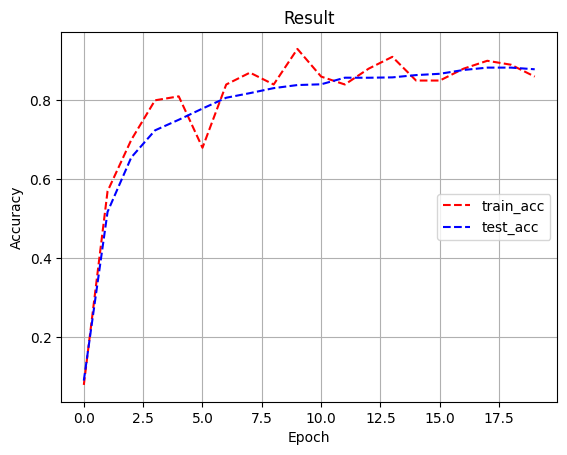

In [52]:
plt.plot(np.arange(1000//50), train_acc_list, 'r--', label='train_acc')
plt.plot(np.arange(1000//50), test_acc_list, 'b--', label='test_acc')

plt.title('Result')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc=5)
plt.grid()
plt.show()

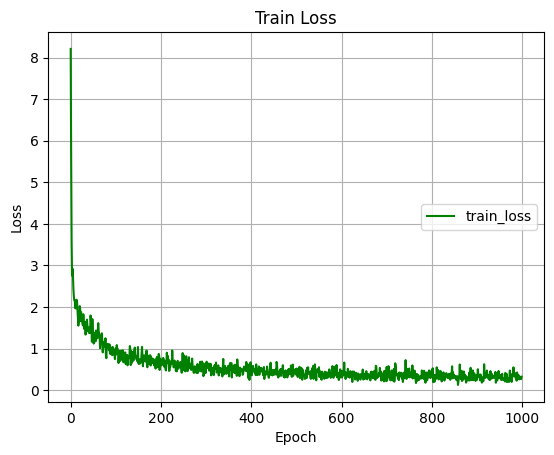

In [53]:
plt.plot(np.arange(1000), train_loss_list, 'green', label='train_loss')

plt.title('Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc=5)
plt.grid()
plt.show()